In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
from matplotlib import rcParams
from matplotlib import pylab as plt
from matplotlib import colors
%matplotlib inline

import os

SHOW = True

In [2]:
# # open qtconsole for debugging
# OPEN_QT = True
# if OPEN_QT:
#     %qtconsole
#     OPEN_QT = False

In [3]:
# read in data
filename = "nature25479_f2_formatted.csv"
data_df = pd.read_csv(filename, sep='\t')

# get column names, because there are weird escape characterts in the csv
Species, Individual, Peak_Power = data_df.columns

# show data
if SHOW:
    print("\n---dataframe column names---")
    print(Species + ", " + Individual + ", " + Peak_Power)
    print("\n---head of dataframe---")
    print(data_df.head())
    print("\n---info of dataframe---")
    print(data_df.info())


---dataframe column names---
Species, Individual, Peak_Power

---head of dataframe---
   Species  Individual  Peak_Power
0  Cheetah           1  125.359685
1  Cheetah           1  150.385658
2  Cheetah           1  121.662070
3  Cheetah           1  179.773215
4  Cheetah           1   36.601252

---info of dataframe---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 3 columns):
Species       174 non-null object
Individual    174 non-null int64
Peak_Power    174 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.2+ KB
None


In [4]:
# copy df
data_original = data_df.copy()

# drop the individual's column, not used
data_df = data_original.drop(Individual, axis=1)

# group by species on peak power column
data_group = data_df.groupby(by=Species)

# apply method on group, such as average or std
data_count = data_group.count()
data_mean = data_group.mean()
data_std = data_group.std()
data_sem = data_std/data_count

# show data
if SHOW:
    print("\n---number of data points per species---")
    print(data_count)
    print("\n---mean per species---")
    print(data_mean)
    print("\n---standard deviation per species---")
    print(data_std)
    print("\n---standard error from the mean per species---")
    print(data_sem)


---number of data points per species---
         Peak_Power
Species            
Cheetah          37
Impala           30
Lion             50
Zebra            57

---mean per species---
         Peak_Power
Species            
Cheetah  107.779942
Impala    89.901928
Lion     102.444480
Zebra     79.675700

---standard deviation per species---
         Peak_Power
Species            
Cheetah   33.780198
Impala    24.892209
Lion      39.831664
Zebra     34.282241

---standard error from the mean per species---
         Peak_Power
Species            
Cheetah    0.912978
Impala     0.829740
Lion       0.796633
Zebra      0.601443


In [5]:
# figure size
rcParams['figure.figsize'] = (2,4) # figsize height x width

# text sizes (follow publication guidelines)
SMALL_SIZE = 6
MEDIUM_SIZE = 8
BIGGER_SIZE = 10
rcParams['font.size'] = SMALL_SIZE          # controls default text sizes
rcParams['axes.titlesize'] = SMALL_SIZE     # fontsize of the axes title
rcParams['axes.labelsize'] = MEDIUM_SIZE    # fontsize of the x and y labels
rcParams['xtick.labelsize'] = SMALL_SIZE    # fontsize of the tick labels
rcParams['ytick.labelsize'] = SMALL_SIZE    # fontsize of the tick labels
rcParams['legend.fontsize'] = SMALL_SIZE    # legend fontsize
rcParams['figure.titlesize'] = BIGGER_SIZE  # fontsize of the figure title

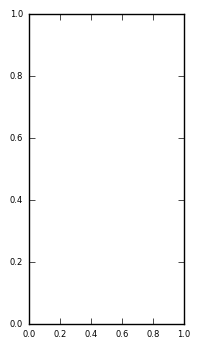

In [6]:
# plot basic skeleton
fig, ax = plt.subplots(1,1);

# convert data to array (rather than dataframe) and input to violin plot
# this may not be the most optimal way, please add in your suggestions
unique_animals = data_df[Species].unique() 
data_list = []
for animal in unique_animals:
    # grab data associated per species (aka animal), and only the peak power column (aka data)
    animal_data = data_df[data_df[Species] == animal][Peak_Power]
    animal_data = animal_data.values
    data_list.append(animal_data)   

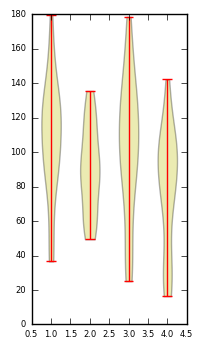

In [7]:
# bare bones
ax.clear()
ax.violinplot(data_list)
fig

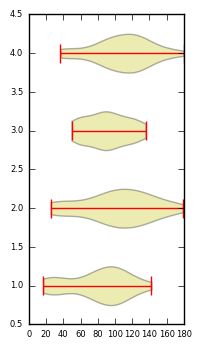

In [8]:
# make them horizontal
# note, that we want to rotate them from left to right
data_list = data_list[::-1]
ax.clear()
ax.violinplot(data_list, vert=False)
fig


---parameters of the violin plot that you can change---
dict_keys(['cmeans', 'bodies'])


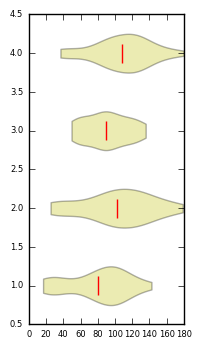

In [9]:
# remove and add relevant peices
ax.clear()
parts = ax.violinplot(data_list, 
                      showmeans=True, 
                      showmedians=False, 
                      showextrema=False, 
                      vert=False)
if SHOW:
    print("\n---parameters of the violin plot that you can change---")
    print(parts.keys())

fig

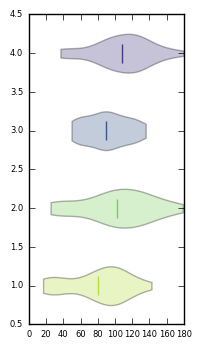

In [10]:
# change colors of violins
# colors
cmap = np.array(["#B9DC3D", "#78CE5C", "#3B568A", "#45397F"])
cmap_rep = np.array(["#4473B0", "#C15436", "#6E348C", "#E4AC43"])

# opacity
alpha = 1

for color, patch in zip(cmap, parts['bodies']):
    # annoying aspect of color changing, changing alpha changes both face and edge color
    # convert color to rgb and manually insert alpha channel
    # note that the data type we're dealing with is tuple (immutable)
    rgb = colors.hex2color(color)
    rgba = [rgb[0], rgb[1], rgb[2], alpha]
    
    # convert edge and face color individually
    patch.set_facecolor(rgba)
    patch.set_edgecolor('k') 
    # patch.set_alpha(0.25)
    
# change line color
line_collection = parts['cmeans']
line_collection.set_color(cmap)

fig    

In [11]:
# place points
# matplotlib's dogma is to not tinker with the data, that being said, there is no jitter command.
# so we will make one of our own
def jitter(N, index, amplitude=0.25, method='gaussian'):
    """
    @N : number of data points to create new indexes for
    @index : numerical value. Index to plot, or equivalently the mean of the gaussian distribution
    @amplitude : noise power 
    @method : gaussian or random
    returns: 1D array of list with gaussian noise 
    """
    new_index = index * np.ones(N)
    if method == 'gaussian':
        return new_index + (np.random.normal(size=N) * amplitude)
    elif method == "random":
        return new_index  + (np.random.uniform(-1, 1, N) * amplitude)
    else:
        raise Exception("invalid method. Please choose between gaussian or random")

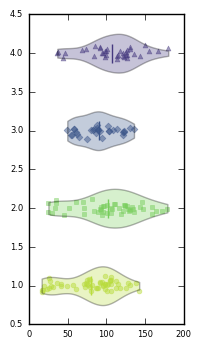

In [12]:
# add in the data using scatter plot
s=12
markers = ['o' ,'s', 'D', '^']

# iterate through each data and assign the appropriate attributes
for index, data in enumerate(data_list):
    # add jitter to index
    N = len(data)
    amplitude=0.05
    new_index = jitter(N, index+1, amplitude=amplitude) # index starts at 1 for violin plot
    
    # plot scatter
    # don't forget we switched the x and y cood with vert=False
    ax.scatter(data, new_index, 
               c=cmap[index], 
               edgecolor=cmap[index],
               marker=markers[index],
               linewidths=0.5,
               s=s, 
               alpha=0.5, 
               zorder=0)
fig    

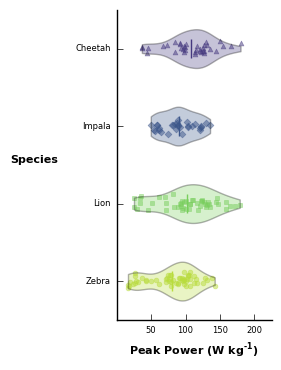

In [13]:
# annotations
# you'll realize that many things are hardcoded are manually inputed. All options are user-specific

# add y ticks
ax.set_yticks([1, 2, 3, 4])
ax.set_yticklabels(unique_animals[::-1])

# add x label
# adding some latex magic with r'$ $'
ax.set_xlabel(r'Peak Power (W kg$^{\mathregular{-1}}$)', weight='bold')

# add y label
ax.set_ylabel('Species', weight='bold', rotation=0, labelpad=30)

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# remove ticks
# tick_params is a powerful wrapper for controlling many aspects of ticks and tick labels
ax.tick_params(top='off', right='off')

# adjusting x limits
ax.set_xlim([0, 225])
ax.locator_params(axis='x', nbins=5)

# just because I don't like zeros, substitute the first 0'th index with empty string
xticks = ax.get_xticklabels()
xticks = [""] + xticks[1:]
ax.set_xticklabels(xticks)

fig